In [1]:
# Importinh necessary libraries
import pandas as pd

In [2]:
file_path = "Superstore.csv"
data = pd.read_csv(file_path)

In [3]:
# Displaying the first few rows of the dataset
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [6]:
# Checking the shape of the dataset
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset contains 9800 rows and 18 columns.


In [7]:
# Displaying column names and their data types
print("Column names:")
print(data.dtypes)

Column names:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


In [9]:
# Checking unique values in key columns
print("\nUnique values in 'Category':", data['Category'].unique())
print("Unique values in 'Region':", data['Region'].unique())


Unique values in 'Category': ['Furniture' 'Office Supplies' 'Technology']
Unique values in 'Region': ['South' 'West' 'Central' 'East']


In [11]:
# Counting occurrences of each value in selected columns
print("\nCounts in 'Category':")
print(data['Category'].value_counts())
print("\nCounts in 'Region':")
print(data['Region'].value_counts())


Counts in 'Category':
Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

Counts in 'Region':
Region
West       3140
East       2785
Central    2277
South      1598
Name: count, dtype: int64


In [13]:
# Checking for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [15]:
# Removing duplicate rows
data = data.drop_duplicates()
print(f"\nDataset after removing duplicates contains {data.shape[0]} rows.")


Dataset after removing duplicates contains 9800 rows.


In [20]:
# Converting 'Order Date' and 'Ship Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)
print("\nData types after converting date columns:")
print(data.dtypes)


Data types after converting date columns:
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object


In [22]:
# Calculating order processing time
data['Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days

In [25]:
# Adding a 'Profit' column assuming a 20% gross margin
data['Profit'] = data['Sales'] * 0.20

In [27]:
# Calculating profit margin
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

In [29]:
# Order processing time calculation (unchanged)
data['Processing Time'] = (data['Ship Date'] - data['Order Date']).dt.days

In [31]:
# Categorizing order size
def categorize_order_size(quantity):
    if quantity <= 5:
        return "Small"
    elif 6 <= quantity <= 10:
        return "Medium"
    else:
        return "Large"

In [33]:
# Adding 'Quantity' column
if 'Quantity' not in data.columns:
    data['Quantity'] = 1 # Temporary assumption: each sale = 1 item

data['Order Size'] = data['Quantity'].apply(categorize_order_size)

In [35]:
# Display the first few rows with new columns
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Processing Time,Profit,Profit Margin,Quantity,Order Size
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,52.3920,20.0,1,Small
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,146.3880,20.0,1,Small
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2.9240,20.0,1,Small
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,191.5155,20.0,1,Small
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,4.4736,20.0,1,Small


### Obliczanie KPI

In [39]:
# Calculating KPI
total_revenue = data['Sales'].sum()
average_revenue_per_order = data['Sales'].mean()
total_profit = data['Profit'].sum()
profit_margin_average = data['Profit Margin'].mean()

In [41]:
# Display KPIs
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Average revenue per Order: ${average_revenue_per_order:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {profit_margin_average:.2f}%")

Total revenue: $2,261,536.78
Average revenue per Order: $230.77
Total Profit: $452,307.36
Average Profit Margin: 20.00%


### Wstępna analiza

In [43]:
# Calculating basic metrics
total_orders = data.shape[0]
unique_customers = data['Customer ID'].nunique()

In [46]:
# Aggregating sales by category and region
category_region_sales = data.groupby(['Category', 'Region']).agg({
    'Sales': ['sum', 'mean'],
    'Profit': ['sum', 'mean']
}).reset_index()

category_region_sales.columns = ['Category', 'Region', 'Total Sales', 'Average Sales', 'Total Profit', 'Average Profit']

In [50]:
# Displaying results
print(f"Total Orders: {total_orders}")
print(f"Unique Customers: {unique_customers}")
print(category_region_sales.head())

Total Orders: 9800
Unique Customers: 793
          Category   Region  Total Sales  Average Sales  Total Profit  \
0        Furniture  Central  160317.4622     341.100983   32063.49244   
1        Furniture     East  206461.3880     349.342450   41292.27760   
2        Furniture    South  116531.4800     357.458528   23306.29600   
3        Furniture     West  245348.2455     355.062584   49069.64910   
4  Office Supplies  Central  163590.2430     116.933698   32718.04860   

   Average Profit  
0       68.220197  
1       69.868490  
2       71.491706  
3       71.012517  
4       23.386740  


### Visualizations using matplotlib/seaborn

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# Setting the style for plots
sns.set(style='whitegrid')

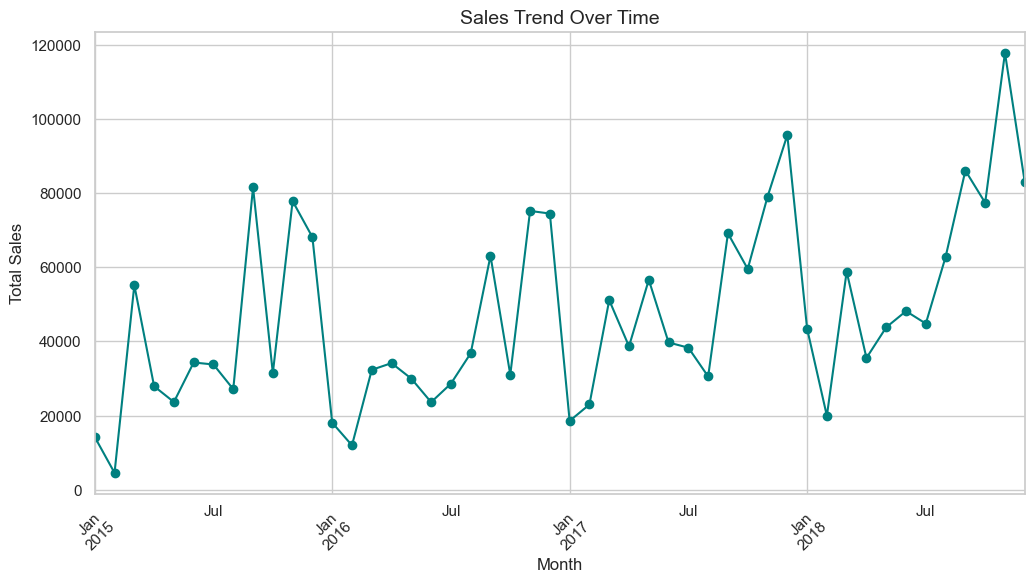

In [57]:
# 1. Sales trend over time
# Adding a column for the month and year of each order
data['Order Month'] = data['Order Date'].dt.to_period('M')
# Grouping sales by month
monthly_sales = data.groupby('Order Month')['Sales'].sum()

# Plotting the sales trend
plt.figure(figsize = (12, 6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title("Sales Trend Over Time", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

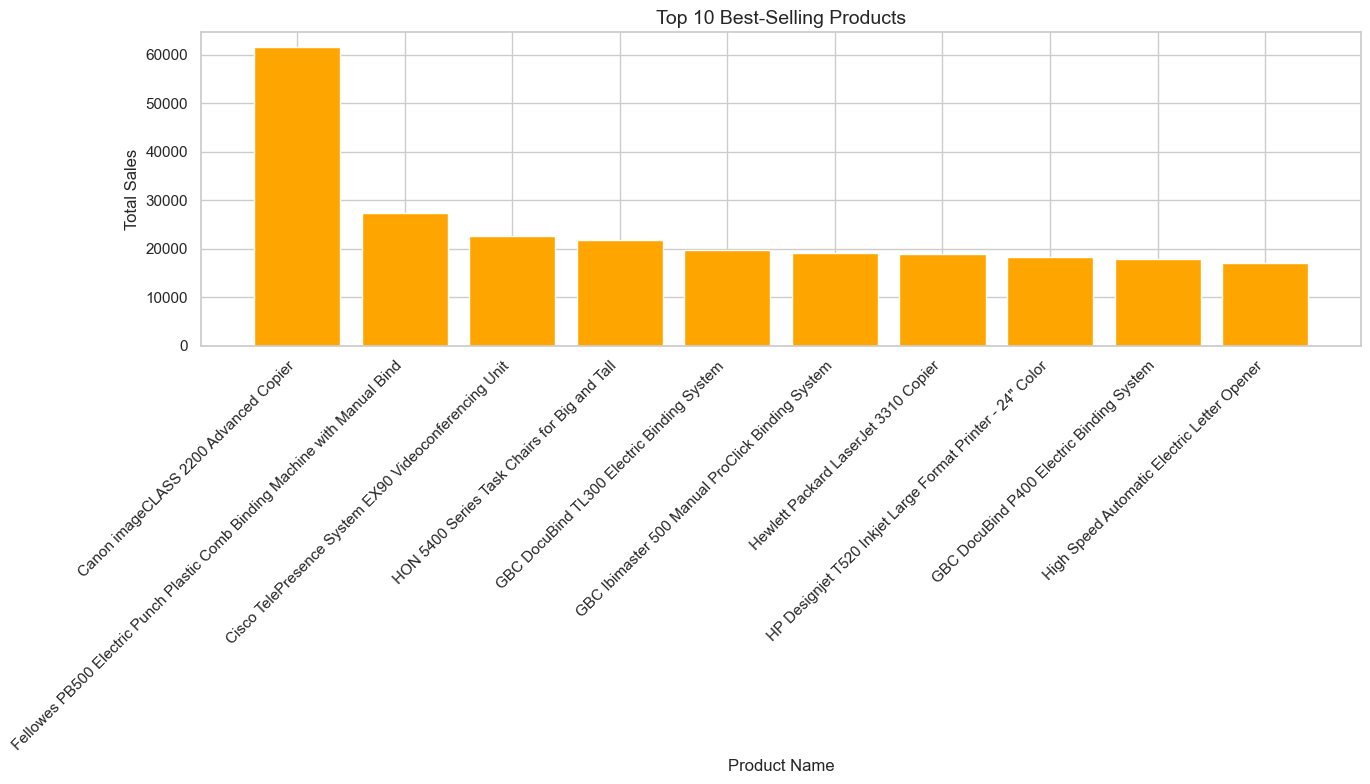

In [81]:
# 2. Top 10 best-selling products
# Aggregating sales by product and selecting the top 10
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

# Plotting top-selling products
plt.figure(figsize = (14, 8))
plt.bar(top_products.index, top_products.values, color='orange')
plt.title("Top 10 Best-Selling Products", fontsize=14)
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

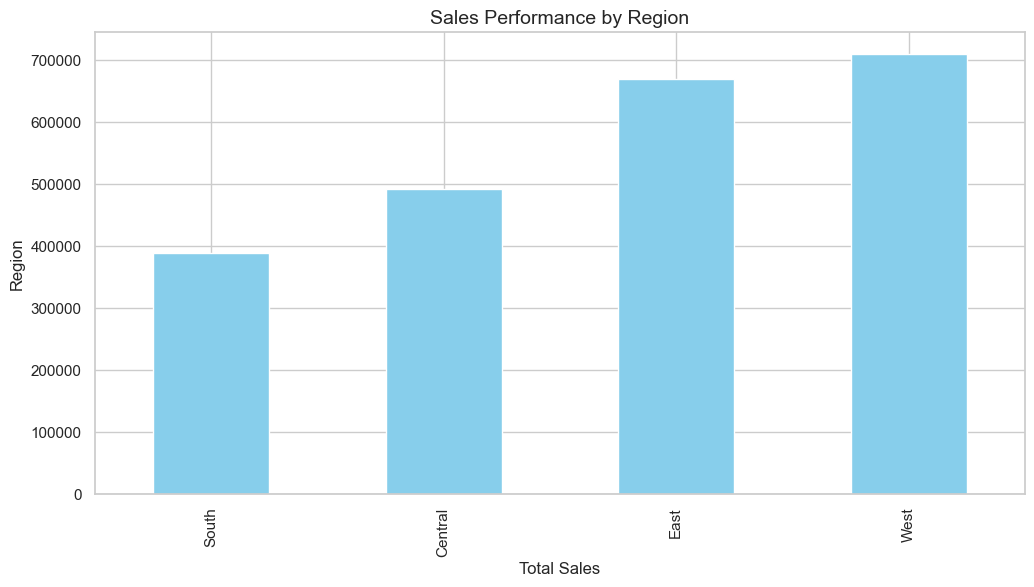

In [69]:
# 3. Sales performance by region
# Aggregating sales by region
region_sales = data.groupby('Region')['Sales'].sum().sort_values()

# Plotting sales performance by region
plt.figure(figsize = (12, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Sales Performance by Region", fontsize=14)
plt.xlabel("Total Sales", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.show()

### Data Export

In [82]:
# Saving the cleaned and enriched dataset to a CSV file
output_file = "cleaned_sales_data.csv"
data.to_csv(output_file, index=False)

print(f"Cleaned data has been saved to {output_file}")

Cleaned data has been saved to cleaned_sales_data.csv
